<a href="https://colab.research.google.com/github/fahimabrar/Machine-Learning/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/fahimabrar/Machine-Learning/main/data/Country-data.csv"))

In [53]:
df.head()
df.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

# We will formulate a problem based on Clustring, So here we are not going to predict anything. All the variables will be considered with independent varaibles, adn we will cluter the countries based on the data

In [84]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

cluster = []
inertia = []

for i in range(1, 8):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)
  cluster.append(i)

## Inertia: It is the sum of squared distances of samples to their closest cluster center.


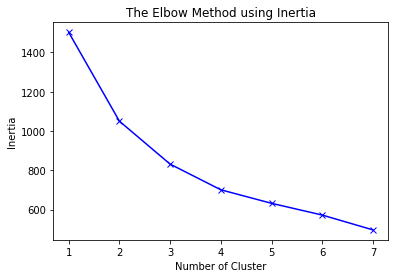

In [87]:
plt.plot(cluster, inertia,  'bx-')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [88]:
s_kmeans = KMeans(n_clusters=3)
s_kmeans.fit(df_scaled)
labels = s_kmeans.labels_
df["labels"] = labels

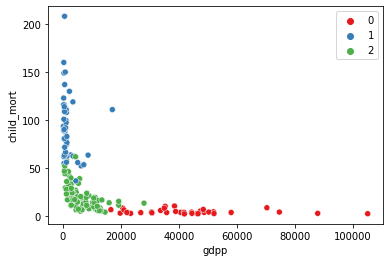

In [72]:
sns.scatterplot(x = 'gdpp', y = 'child_mort' , hue = kmeans.labels_ ,data = df, palette = 'Set1')

In [57]:
!pip install pycountry-convert

In [58]:
from pycountry_convert import country_name_to_country_alpha2

In [59]:
def get_code(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'UNK' 
    return cn_a2_code

In [60]:
df["country_code"] = df.country.apply(get_code)

In [61]:
df.country_code.isnull().any()

False

In [62]:
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim()
def geolocate_lat(col):
    try:
        loc = geolocator.geocode(col)
        return loc.latitude
    except:
      return np.nan

def geolocate_lon(col):
    try:
        loc = geolocator.geocode(col)
        return loc.longitude
    except:
      return np.nan


/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [64]:
df["lat"] = df.country_code.apply(geolocate_lat)
df["lon"] = df.country_code.apply(geolocate_lon)

In [65]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,country_code,lat,lon
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,AF,33.768006,66.238514
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,AL,33.258882,-86.829534
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,DZ,28.000027,2.999983
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,AO,47.593970,14.124560
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,AG,17.223472,-61.955461


In [89]:
df.to_csv("/content/drive/My Drive/kmeans.csv", index= False)

# I visualized the clusters using Tableau. You can do so using python libraries too.

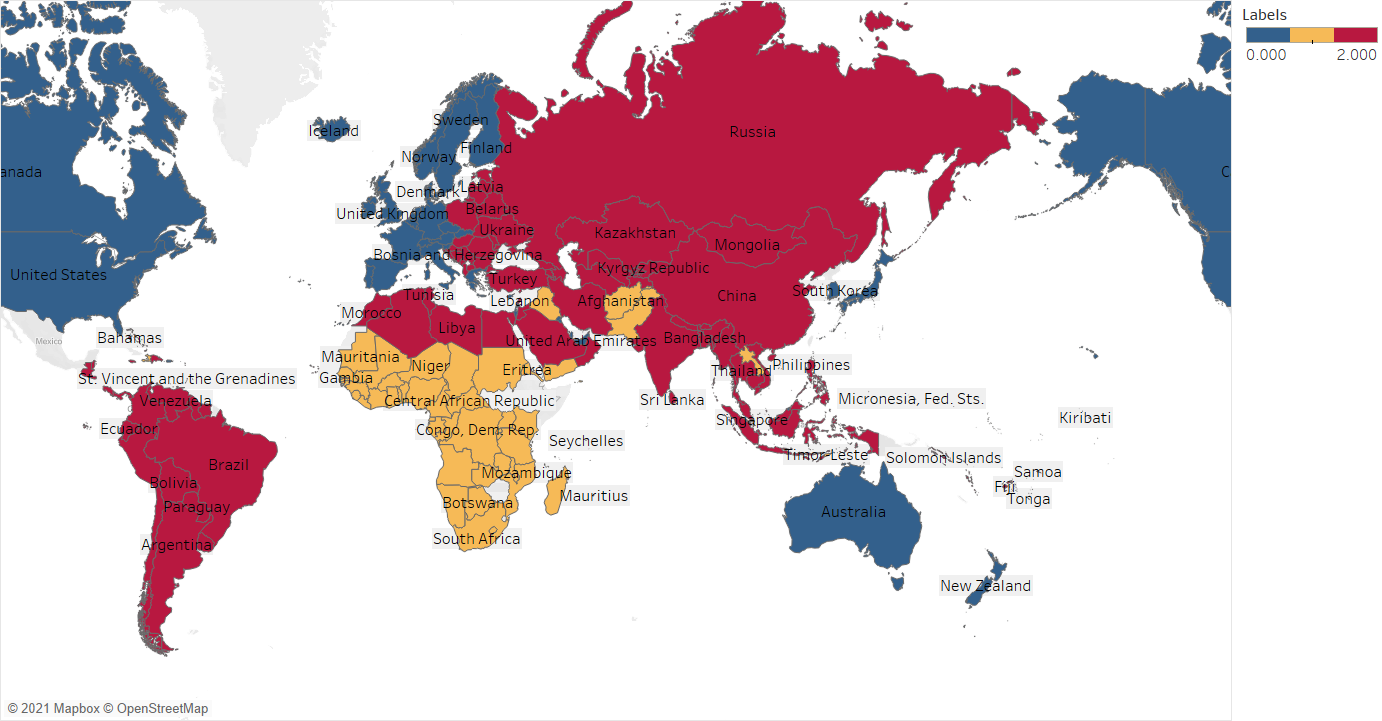